In [4]:
from datetime import timedelta
import torch
from torch.autograd import Variable
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, models,transforms
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import TensorDataset, DataLoader,random_split
import numpy as np 
import pandas as pd
import os
import time
import random
import matplotlib.pyplot as plt 
from torch.autograd import Function
from collections import OrderedDict
import torch.nn as nn
import math
import torchvision.models as models
import pickle
from tqdm.auto import tqdm
import cv2
import wandb
from sklearn.model_selection import KFold
# from torchsummary import summary
import glob
from sklearn.manifold import TSNE
import seaborn as sns
import collections
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
import umap.umap_ as UMAP
import pims

/home/anagara8/.conda/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
# Loading all frames
start = time.time()
all_frames_list = np.load("all_frame_and_action_list.npy")
end = time.time()
print("Training File List containing", len(all_frames_list), "frames loaded in:", end - start)

Training File List containing 8387210 frames loaded in: 1.2262425422668457


In [63]:
all_frames_list[2]

'FC-D_preexposure_W1_06-01-2019_comp2video_2019Y_06M_01D_18h_48m_22s_cam_17202338-0000_7709.jpg'

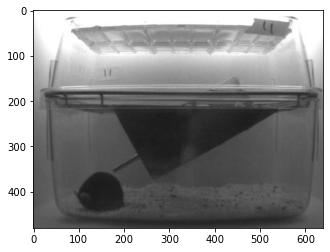

In [75]:
from cvzone.SelfiSegmentationModule import SelfiSegmentation

segmentor = SelfiSegmentation()

frame = cv2.imread('/media/data_cifs/anagara8/preexposure_action/'+all_frames_list[4])
img_Out = segmentor.removeBG(frame, (255,255,255), threshold=0.5)
plt.imshow(frame)

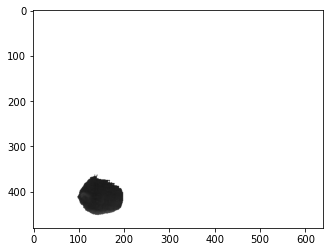

In [76]:
plt.imshow(img_Out)

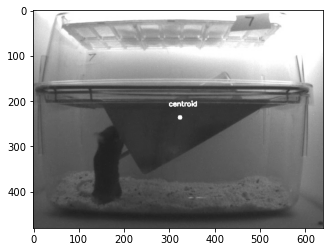

In [68]:
# convert image to grayscale image
gray_image = cv2.cvtColor(img_Out, cv2.COLOR_BGR2GRAY)

# convert the grayscale image to binary image
ret,thresh = cv2.threshold(gray_image,127,255,0)

# calculate moments of binary image
M = cv2.moments(thresh)

# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

# put text and highlight the center
cv2.circle(frame, (cX, cY), 5, (255, 255, 255), -1)
cv2.putText(frame, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

plt.imshow(frame)